([**Return to Week 2 index.**](http://localhost:8890/tree/Desktop/BIOM262/week02#))

# Day Two (1/14/2016)

## Table of Contents
[**1. Simple linear regression**](#1.-Simple-linear-regression)  
[**2. Non-linear relationship: particle decay**](#2.-Non-linear-relationships)  
[**3. Non-linear regression**](#3.-Non-linear-regression)  
[**4. Analysis of variance**](#4.-Analysis-of-variance)  
[**5. ANCOVA**](#5.-ANCOVA)

* * *

## 1. Simple linear regression

**Load the data and look at it.**  This is data on plant growth and tannin content

In [1]:
reg.data<-read.csv('/Users/apple/Desktop/BIOM262/week02/tannin.csv')
reg.data

Warning message:
In file(file, "rt"): cannot open file '/Users/apple/Desktop/BIOM262/week02/tannin.csv': No such file or directory

ERROR: Error in file(file, "rt"): cannot open the connection


ERROR: Error in eval(expr, envir, enclos): object 'reg.data' not found


**Plot the data**

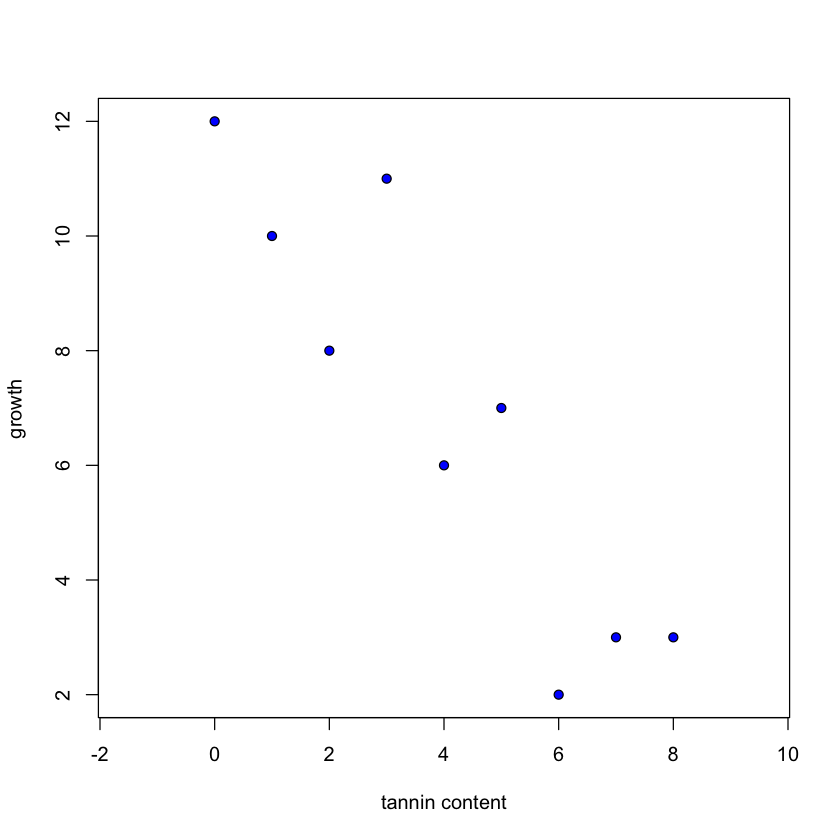

In [16]:
plot(reg.data$tannin,reg.data$growth,pch=21,bg="blue",asp=1,xlab="tannin content",ylab="growth")

**Make a simple linear model** where growth is a linear function of tannin

In [ ]:
reg.model=lm(growth~tannin,data=reg.data)
reg.model

**Plot this line**

In [ ]:
plot(reg.data$tannin,reg.data$growth,pch=21,bg="blue",asp=1,xlab="tannin content",ylab="growth")
abline(lm(growth~tannin,data=reg.data),col="cyan",lwd=2)

**Store the model**

In [ ]:
fitted <- predict(lm(growth~tannin,data=reg.data))

**Plot the error (residuals)**

In [ ]:
plot(reg.data$tannin,reg.data$growth,pch=21,bg="blue",asp=1,xlab="tannin content",ylab="growth")
abline(lm(growth~tannin,data=reg.data),col="cyan",lwd=2)
for (i in 1:9) {
  lines(c(reg.data$tannin[i],reg.data$tannin[i]),c(reg.data$growth[i],fitted[i]),col="magenta")
}

**Plot square residuals**

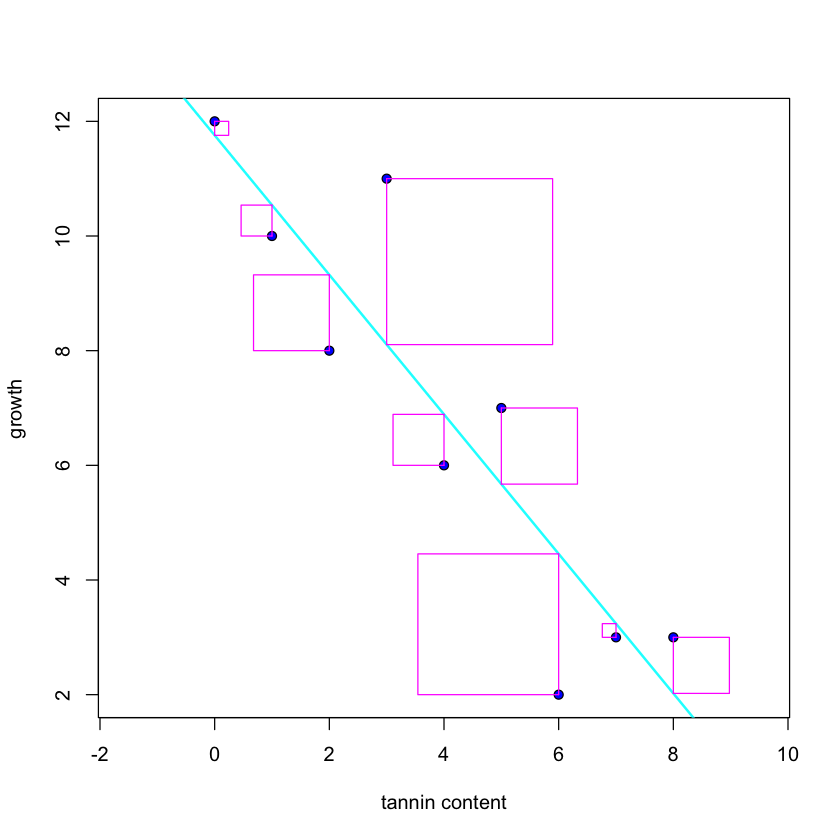

In [21]:
plot(reg.data$tannin,reg.data$growth,pch=21,bg="blue",asp=1,xlab="tannin content",ylab="growth")
abline(lm(growth~tannin,data=reg.data),col="cyan",lwd=2)
for (i in 1:9) {
  lines(c(reg.data$tannin[i],reg.data$tannin[i]),c(reg.data$growth[i],fitted[i]),col="magenta")
res=abs(reg.data$growth[i]-fitted[i])
    if (reg.data$growth[i]<fitted[i]) {#then square goes to left
    lines(c(reg.data$tannin[i],reg.data$tannin[i]-res,reg.data$tannin[i]-res,reg.data$tannin[i]),c(reg.data$growth[i],reg.data$growth[i],fitted[i],fitted[i]),col="magenta")
    }
    else {#then square goes to left
    lines(c(reg.data$tannin[i],reg.data$tannin[i]+res,reg.data$tannin[i]+res,reg.data$tannin[i]),c(reg.data$growth[i],reg.data$growth[i],fitted[i],fitted[i]),col="magenta")
    }
    }

**Estimating the line**

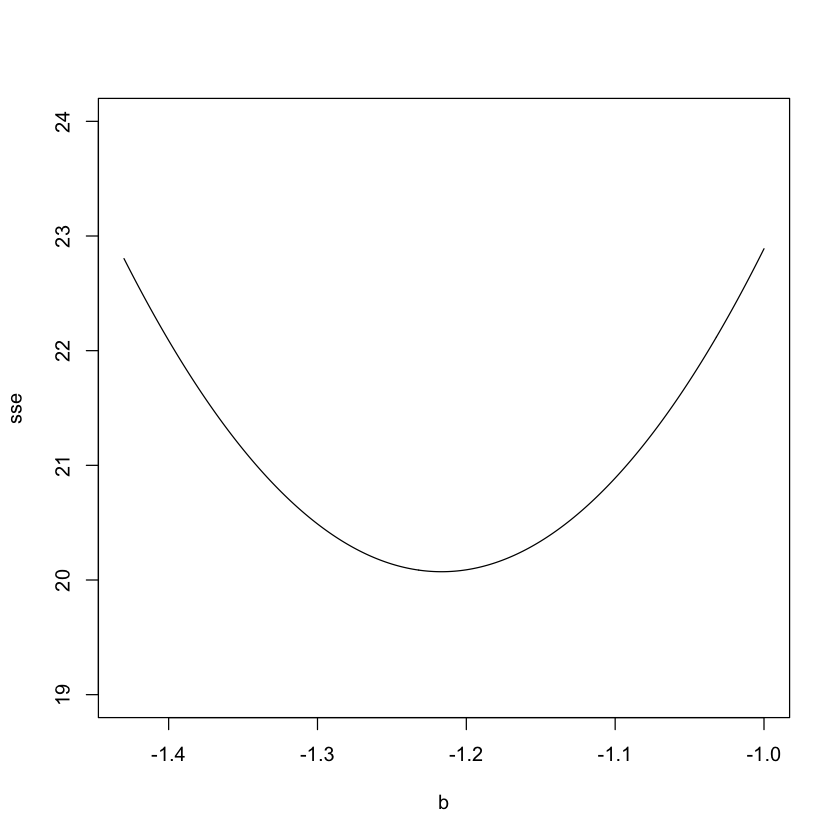

In [22]:
b <-  seq(-1.43,-1,0.002)
sse <- numeric(length(b))
for (i in 1:length(b)) {
  a <- mean(reg.data$growth)-b[i]*mean(reg.data$tannin)
  residual <- reg.data$growth - a - b[i]*reg.data$tannin
  sse[i] <- sum(residual^2)
}
mlval=b[which(sse==min(sse))]
plot(b,sse,type="l",ylim=c(19,24))


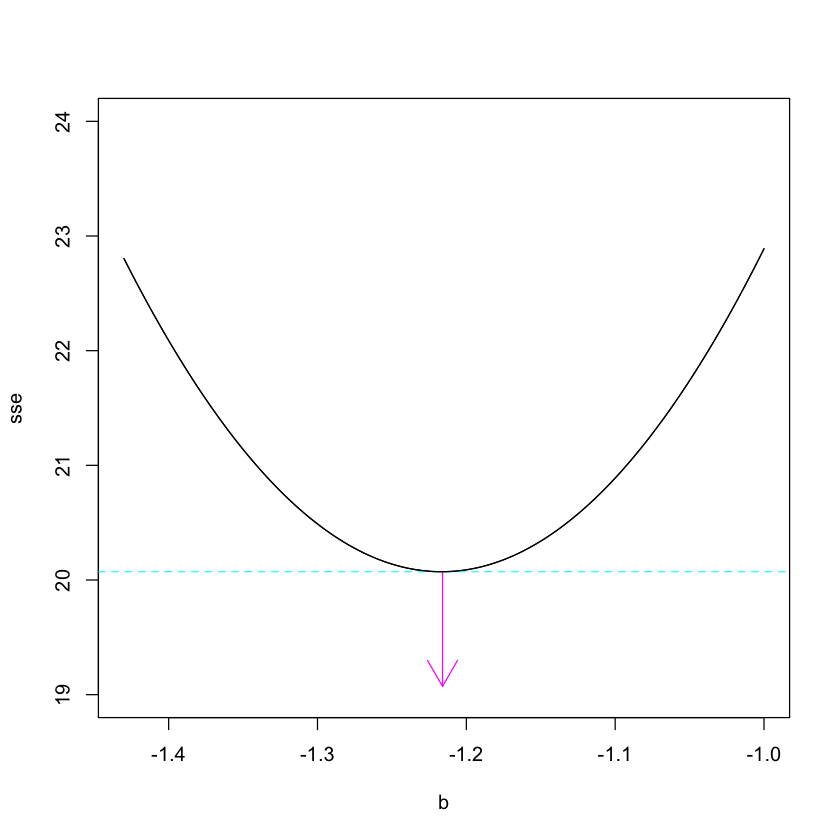

In [23]:
b <-  seq(-1.43,-1,0.002)
sse <- numeric(length(b))
for (i in 1:length(b)) {
  a <- mean(reg.data$growth)-b[i]*mean(reg.data$tannin)
  residual <- reg.data$growth - a - b[i]*reg.data$tannin
  sse[i] <- sum(residual^2)
}
mlval=b[which(sse==min(sse))]
plot(b,sse,type="l",ylim=c(19,24))
arrows(mlval,min(sse),mlval,min(sse)-1,col="magenta")
abline(h=min(sse),col="cyan",lty=2)
lines(b,sse)

**Sums of squares**

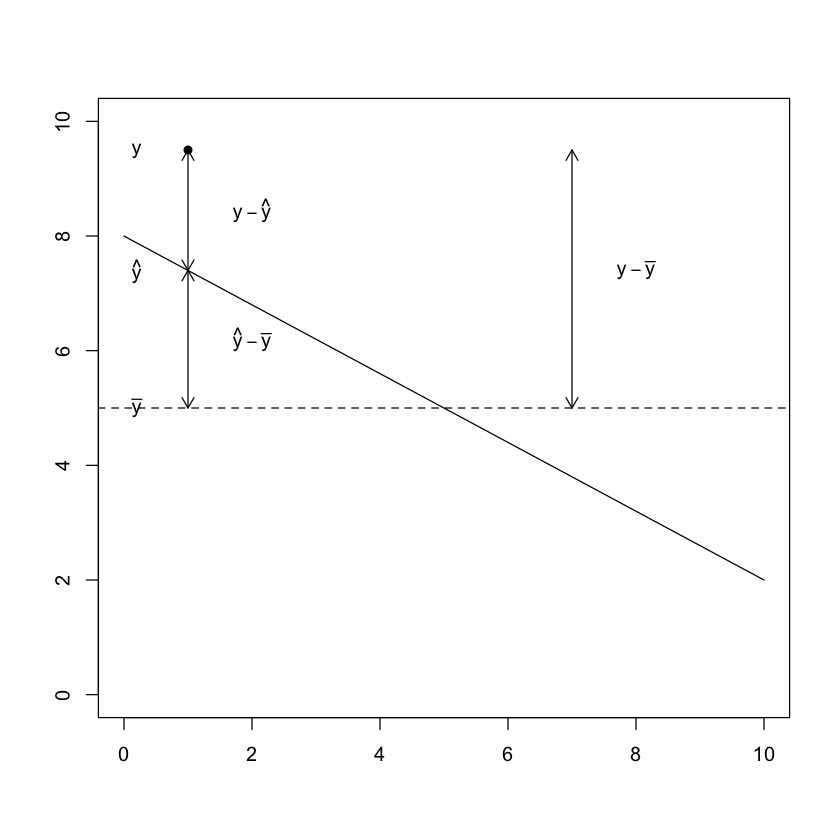

In [24]:
plot(c(0,10),c(0,10),xlab="",ylab="",type="n")
abline(h=5,lty=2)
lines(c(0,10),c(8,2))
text(2,6.2,expression(hat(y) - bar(y)))
text(2,8.45,expression(y - hat(y)))
arrows(7,5,7,9.5,code=3,length=0.1)
arrows(1,5,1,7.4,code=3,length=0.1)
arrows(1,9.5,1,7.4,code=3,length=0.1)
points(1,9.5,pch=16)
text(8,7.4,expression(y - bar(y)))
text(0.2,5,expression(bar(y)))
text(.2,7.4,expression(hat(y)))
text(.2,9.5,"y")

**Regression model**

In [25]:
model <- lm(growth~tannin,data=reg.data)
summary(model)
#summary.aov(model)


Call:
lm(formula = growth ~ tannin, data = reg.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4556 -0.8889 -0.2389  0.9778  2.8944 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.7556     1.0408  11.295 9.54e-06 ***
tannin       -1.2167     0.2186  -5.565 0.000846 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.693 on 7 degrees of freedom
Multiple R-squared:  0.8157,	Adjusted R-squared:  0.7893 
F-statistic: 30.97 on 1 and 7 DF,  p-value: 0.0008461


(End of Section 1. [Return to top.](#Table-of-Contents))

* * *

## 2. Non-linear relationships
**Particle decay**

In [26]:
decay<-read.csv('/Users/apple/Desktop/BIOM262/week02/decay.csv')
decay

,time,amount
1,0,125
2,1,100.2489
3,2,70
4,3,83.4708
5,4,100
6,5,65.90787
7,6,66.53371
8,7,53.58809
9,8,61.33235
10,9,43.92744


**Plot the data**

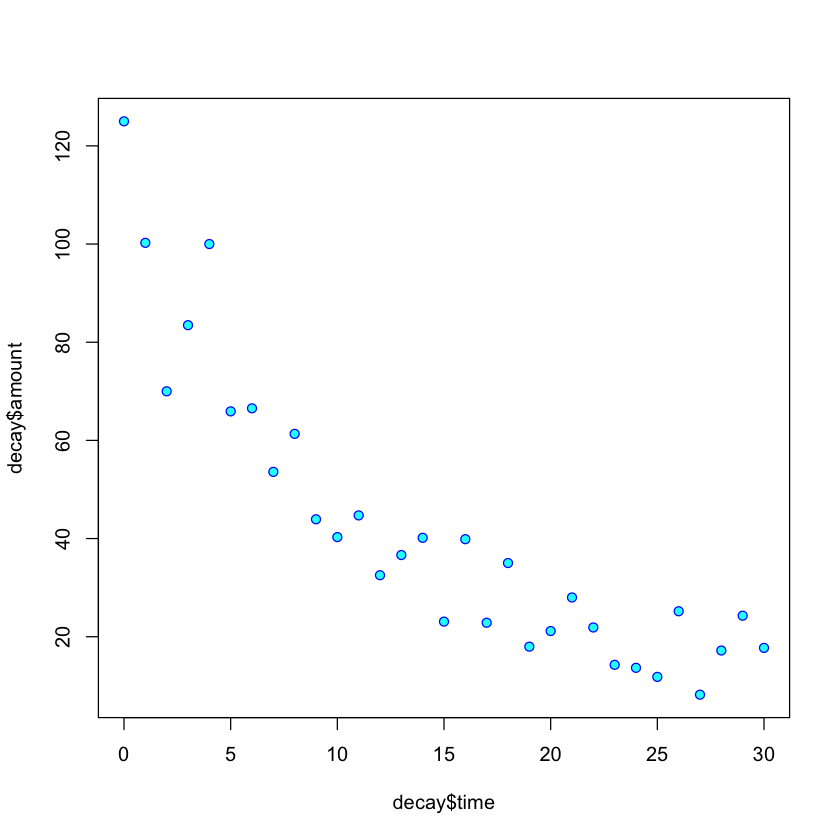

In [27]:
plot(decay$time,decay$amount,pch=21,col="blue",bg="cyan")

**Linear fit**


Call:
lm(formula = amount ~ time, data = decay)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.065 -10.029  -2.058   5.107  40.447 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  84.5534     5.0277   16.82  < 2e-16 ***
time         -2.8272     0.2879   -9.82 9.94e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.34 on 29 degrees of freedom
Multiple R-squared:  0.7688,	Adjusted R-squared:  0.7608 
F-statistic: 96.44 on 1 and 29 DF,  p-value: 9.939e-11


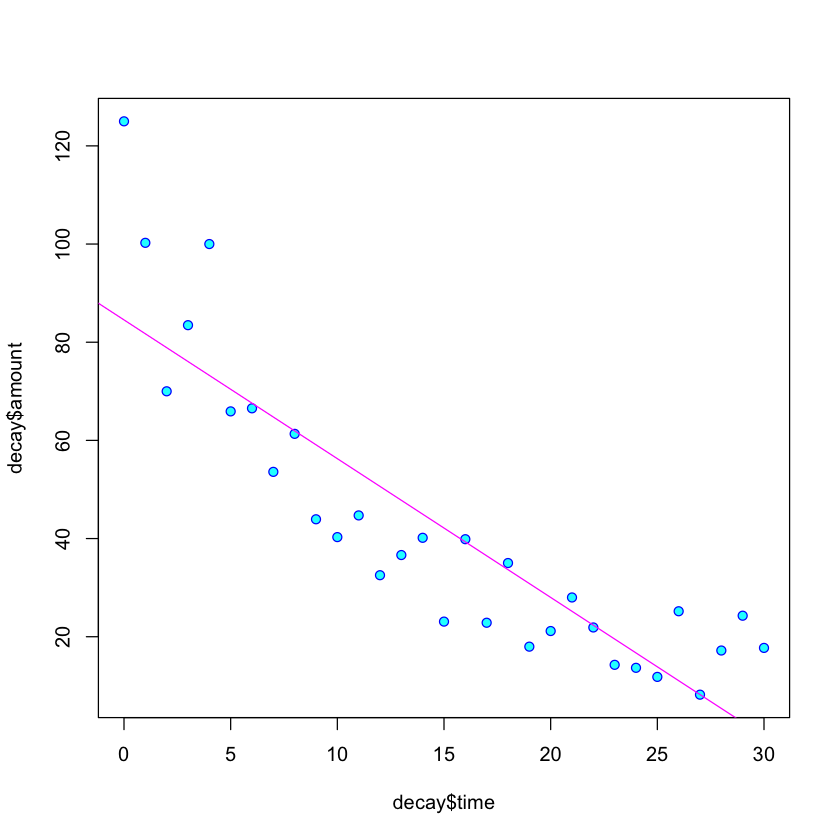

In [28]:
plot(decay$time,decay$amount,pch=21,col="blue",bg="cyan")
abline(lm(amount~time,data=decay),col="magenta")
linmodel=lm(amount~time,data=decay)
summary(lm(amount~time,data=decay))

**Transform data** to make it more linear


Call:
lm(formula = log(amount) ~ time, data = decay)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5935 -0.2043  0.0067  0.2198  0.6297 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.547386   0.100295   45.34  < 2e-16 ***
time        -0.068528   0.005743  -11.93 1.04e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.286 on 29 degrees of freedom
Multiple R-squared:  0.8308,	Adjusted R-squared:  0.825 
F-statistic: 142.4 on 1 and 29 DF,  p-value: 1.038e-12


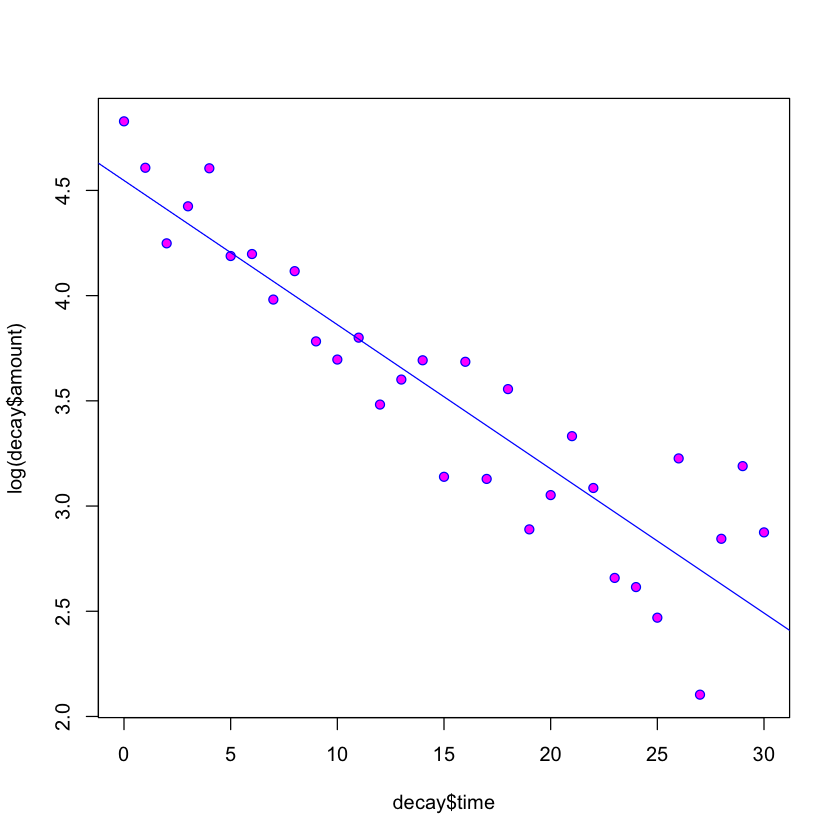

In [29]:
plot(decay$time,log(decay$amount),pch=21,col="blue",bg="magenta")
abline(lm(log(amount)~time,data=decay),col="blue")
model <- lm(log(amount)~time,data=decay)
summary(model)

Plot the model against the raw data

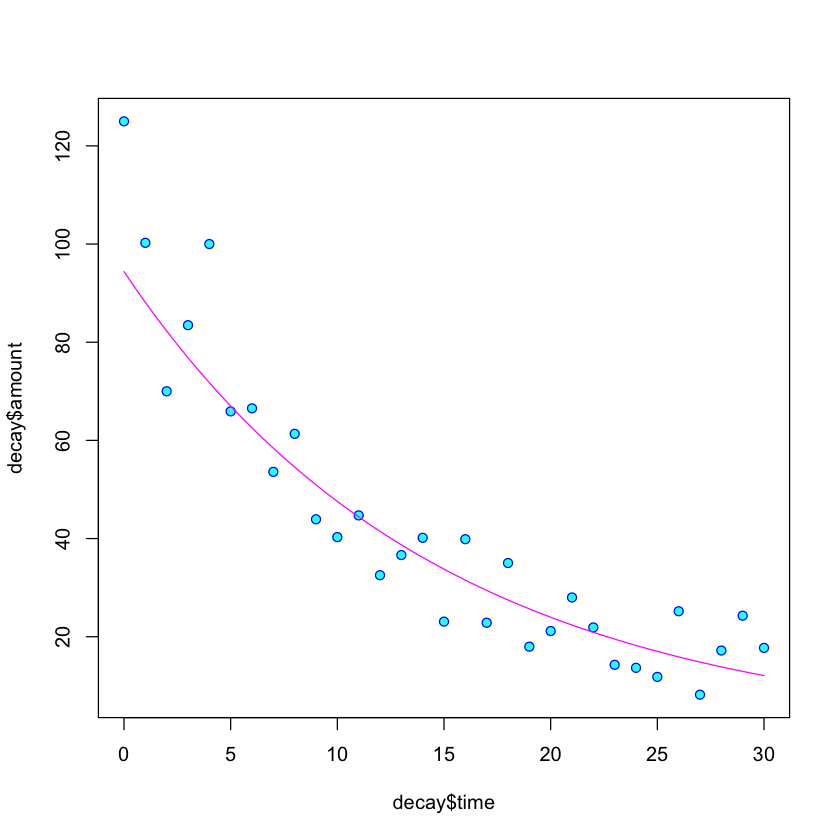

In [30]:
plot(decay$time,decay$amount,pch=21,col="blue",bg="cyan")
xv <- seq(0,30,0.25)
yv <- exp(model$coefficients[1]) * exp(model$coefficients[2] * xv)
lines(xv,yv,col="magenta")

In [31]:

AIC(linmodel,model)


,df,AIC
linmodel,3,257.0016
model,3,14.29588


(End of Section 2. [Return to top.](#Table-of-Contents))

* * *

## 3. Non-linear regression
**Example 2**

In [32]:
deer<-read.csv('/Users/apple/Desktop/BIOM262/week02/jaws.csv')
deer

,age,bone
1,0,0
2,5.112,20.22
3,1.32,11.1113
4,35.24,140.65
5,1.632931,26.15218
6,2.297635,10.001
7,3.322125,55.85634
8,4.043794,46.06754
9,5.266018,67.24174
10,6.07506,59.63458


Plot the data

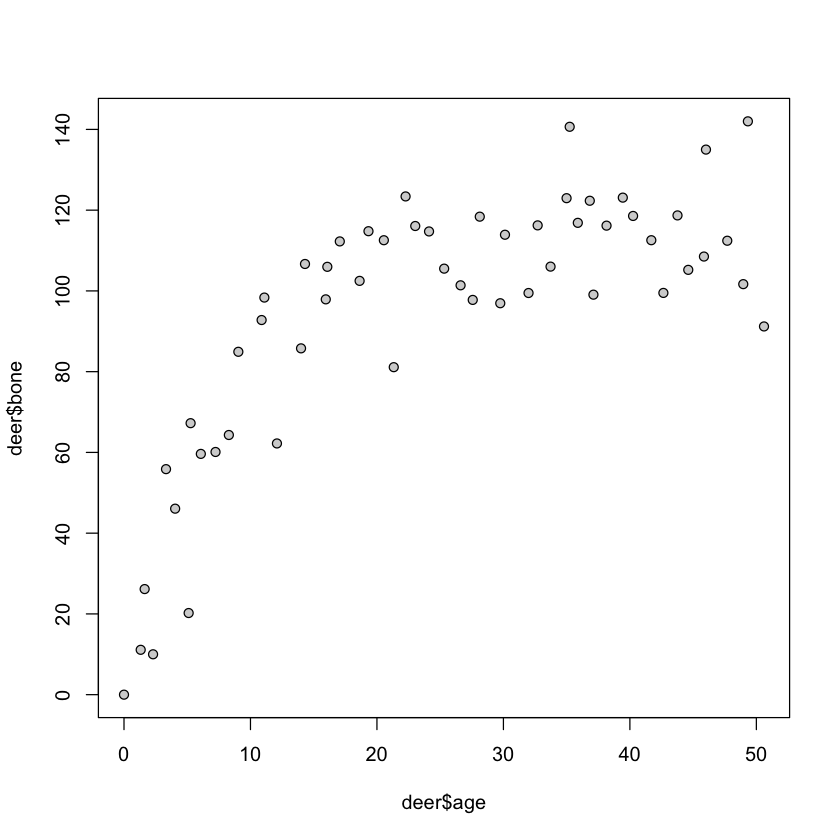

In [33]:
plot(deer$age,deer$bone,pch=21,bg="lightgrey")


Formula: bone ~ a - b * exp(-c * age)

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a 115.2528     2.9139   39.55  < 2e-16 ***
b 118.6875     7.8925   15.04  < 2e-16 ***
c   0.1235     0.0171    7.22 2.44e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.21 on 51 degrees of freedom

Number of iterations to convergence: 5 
Achieved convergence tolerance: 2.383e-06


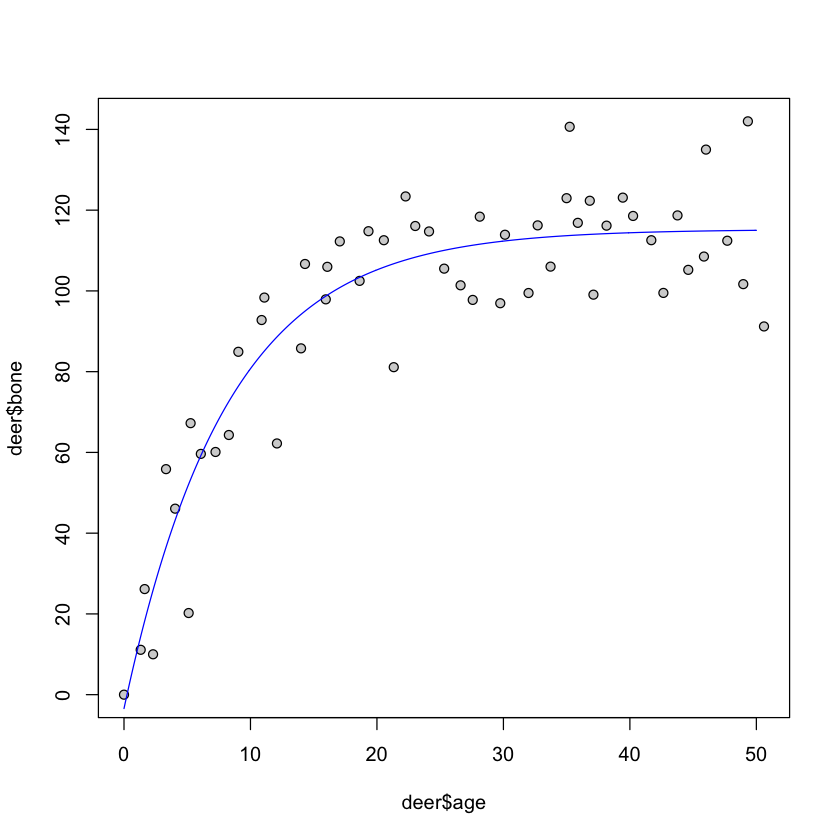

In [34]:
model <- nls(bone~a-b*exp(-c*age),data=deer,start=list(a=120,b=110,c=0.064))
summary(model)
av <- seq(0,50,0.1)
bv <- predict(model,list(age=av),data=deer)
plot(deer$age,deer$bone,pch=21,bg="lightgrey")
lines(av,bv,col="blue")


Formula: bone ~ a * (1 - exp(-c * age))

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 115.58055    2.84365  40.645  < 2e-16 ***
c   0.11882    0.01233   9.635 3.69e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.1 on 52 degrees of freedom

Number of iterations to convergence: 5 
Achieved convergence tolerance: 1.365e-06


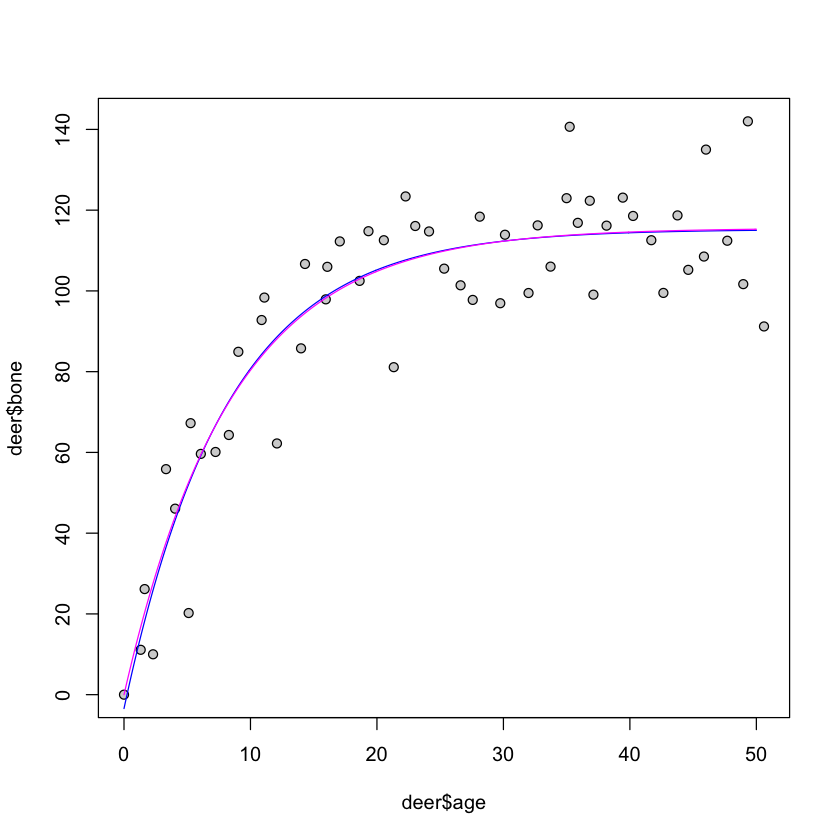

In [35]:
model2 <- nls(bone~a*(1-exp(-c*age)),data=deer,start=list(a=120,c=0.064))
av2 <- seq(0,50,0.1)
bv2 <- predict(model2,list(age=av2),data=deer)
plot(deer$age,deer$bone,pch=21,bg="lightgrey")
lines(av,bv,col="blue")
lines(av2,bv2,col="magenta")
summary(model2)

In [36]:
AIC(model,model2)
#anova(model,model2)

,df,AIC
model,4,436.8894
model2,3,435.0823


(End of Section 3. [Return to top.](#Table-of-Contents))

* * *

## 4. Analysis of variance

In [37]:
oneway<-read.csv('/Users/apple/Desktop/BIOM262/week02/oneway.csv')
oneway

,ozone,garden
1,3,A
2,5,B
3,4,A
4,5,B
5,4,A
6,6,B
7,3,A
8,7,B
9,2,A
10,4,B


Plot the data

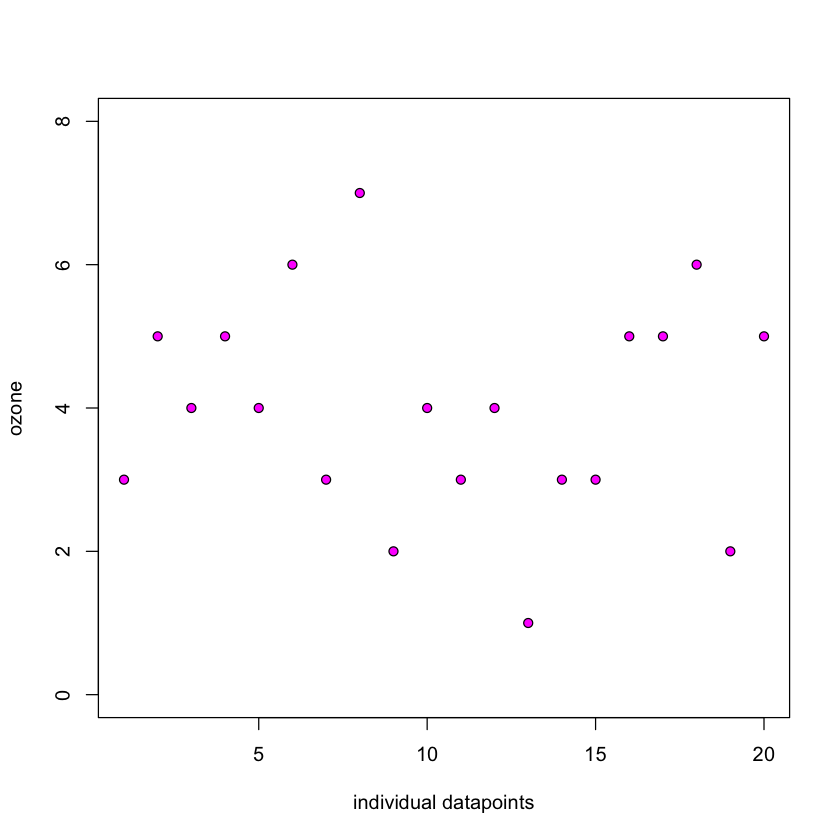

In [51]:
plot(1:20,oneway$ozone,ylim=c(0,8),ylab="ozone",xlab="individual datapoints",pch=21,bg="magenta")
#abline(h=mean(oneway$ozone),col="blue")
#for(i in 1:20) lines(c(i,i),c(mean(oneway$ozone),oneway$ozone[i]),col="cyan")


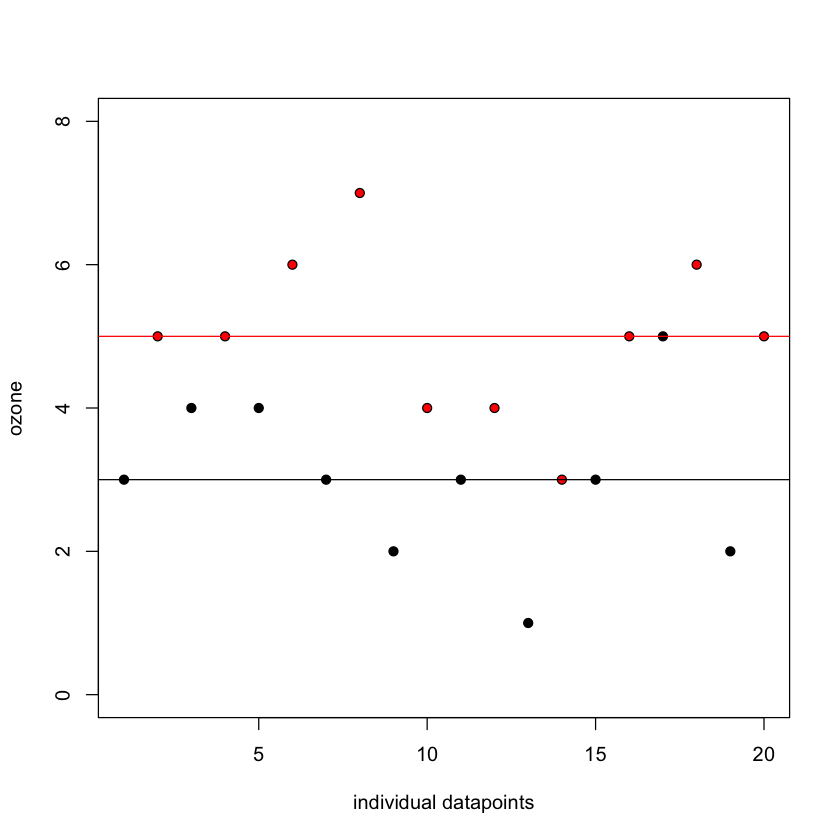

In [52]:
plot(1:20,oneway$ozone,ylim=c(0,8),ylab="ozone",xlab="individual datapoints",
     pch=21,bg=as.numeric(oneway$garden))
## 5f ##
abline(h=mean(oneway$ozone[oneway$garden=="A"]))
abline(h=mean(oneway$ozone[oneway$garden=="B"]),col="red")
#index <- 1:length(oneway$ozone)
#for (i in 1:length(index)){
#  if (oneway$garden[i] == "A" )
#    lines(c(index[i],index[i]),c(mean(oneway$ozone[oneway$garden=="A"]),oneway$ozone[i]))
#  else 
#    lines(c(index[i],index[i]),c(mean(oneway$ozone[oneway$garden=="B"]),oneway$ozone[i]), col="red")
#}


In [53]:
summary(aov(ozone~garden,data=oneway))

            Df Sum Sq Mean Sq F value  Pr(>F)   
garden       1     20  20.000      15 0.00111 **
Residuals   18     24   1.333                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(End of Section 4. [Return to top.](#Table-of-Contents))

* * *

## 5. ANCOVA

In [41]:
ancdata<-read.csv('/Users/apple/Desktop/BIOM262/week02/ipomopsis.csv')
ancdata

,Root,Fruit,Grazing
1,6.225,59.77,Ungrazed
2,6.487,60.98,Ungrazed
3,4.919,14.73,Ungrazed
4,5.13,19.28,Ungrazed
5,5.417,34.25,Ungrazed
6,5.359,35.53,Ungrazed
7,7.614,87.73,Ungrazed
8,6.352,63.21,Ungrazed
9,4.975,24.25,Ungrazed
10,6.93,64.34,Ungrazed


Plot the data

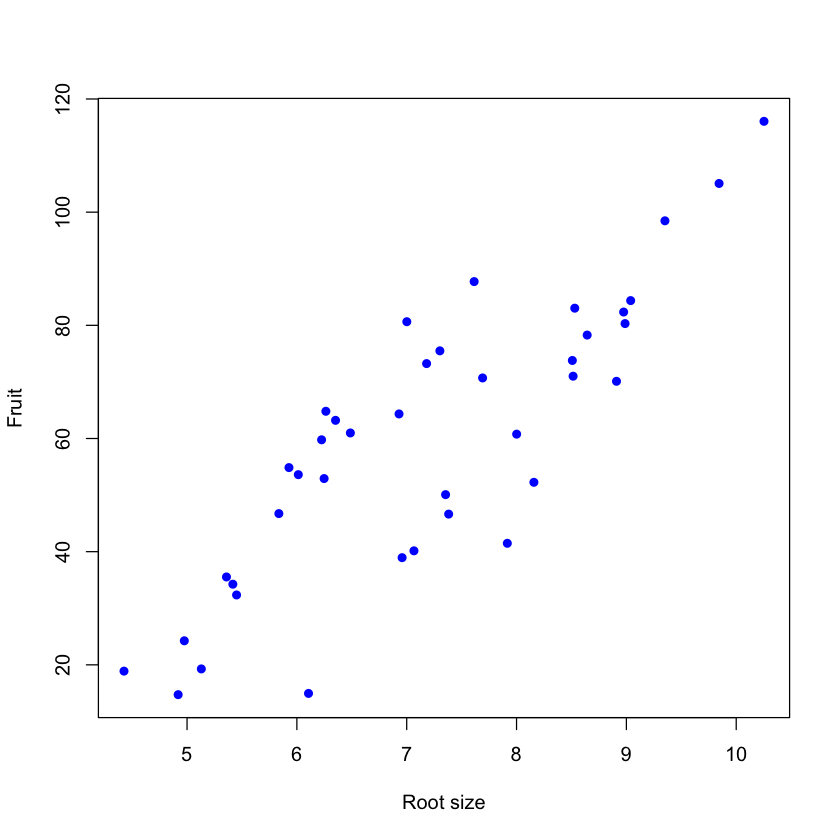

In [42]:
plot(ancdata$Root,ancdata$Fruit,pch=16,col="blue",xlab='Root size',ylab='Fruit')

Another view of the data

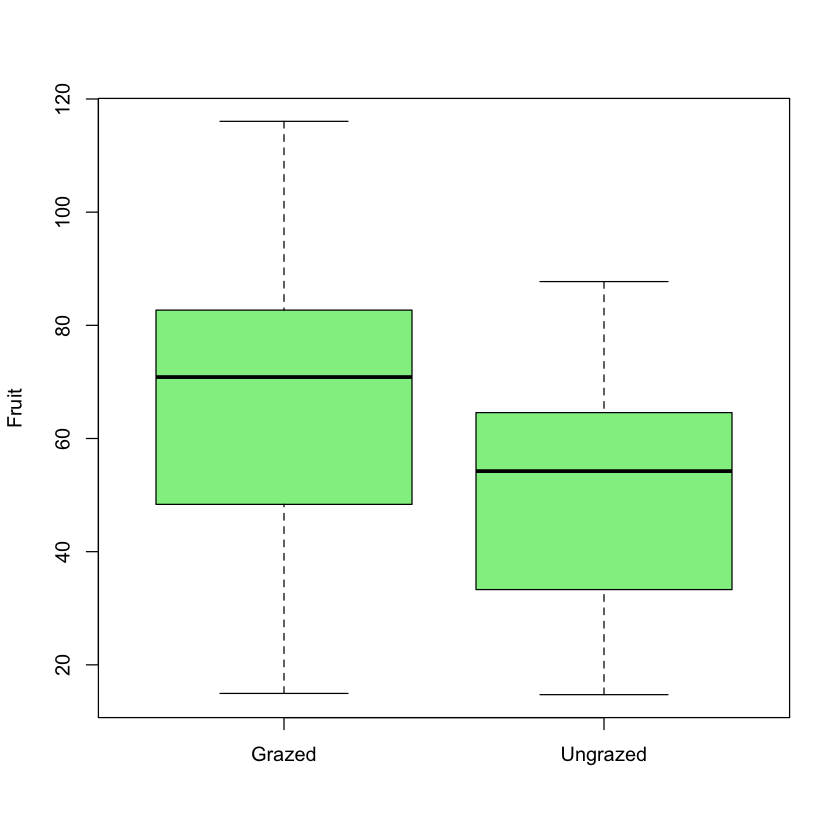

In [43]:
plot(ancdata$Grazing,ancdata$Fruit,col="lightgreen",ylab="Fruit")


Model:  fruit depends on grazing status

In [44]:
justGrazingModel=lm(Fruit~Grazing,data=ancdata)
summary(justGrazingModel)


Call:
lm(formula = Fruit ~ Grazing, data = ancdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.991 -18.028   2.915  14.049  48.109 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       67.941      5.236  12.976 1.54e-15 ***
GrazingUngrazed  -17.060      7.404  -2.304   0.0268 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.41 on 38 degrees of freedom
Multiple R-squared:  0.1226,	Adjusted R-squared:  0.09949 
F-statistic: 5.309 on 1 and 38 DF,  p-value: 0.02678


What about root size?

In [45]:
fullmodel <- lm(Fruit~Root*Grazing,data=ancdata)

In [46]:
summary.aov(fullmodel)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Root          1  16795   16795 359.968  < 2e-16 ***
Grazing       1   5264    5264 112.832 1.21e-12 ***
Root:Grazing  1      5       5   0.103     0.75    
Residuals    36   1680      47                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [47]:
AIC(justGrazingModel,fullmodel)

,df,AIC
justGrazingModel,3,369.7324
fullmodel,5,273.0135


Model without interaction

In [48]:
noInteractionModel=lm(Fruit~Grazing+Root,data=ancdata)


In [49]:
anova(noInteractionModel,fullmodel)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,37,1684.461,NA,NA,NA,NA
2,36,1679.649,1,4.812211,0.1031404,0.7499503


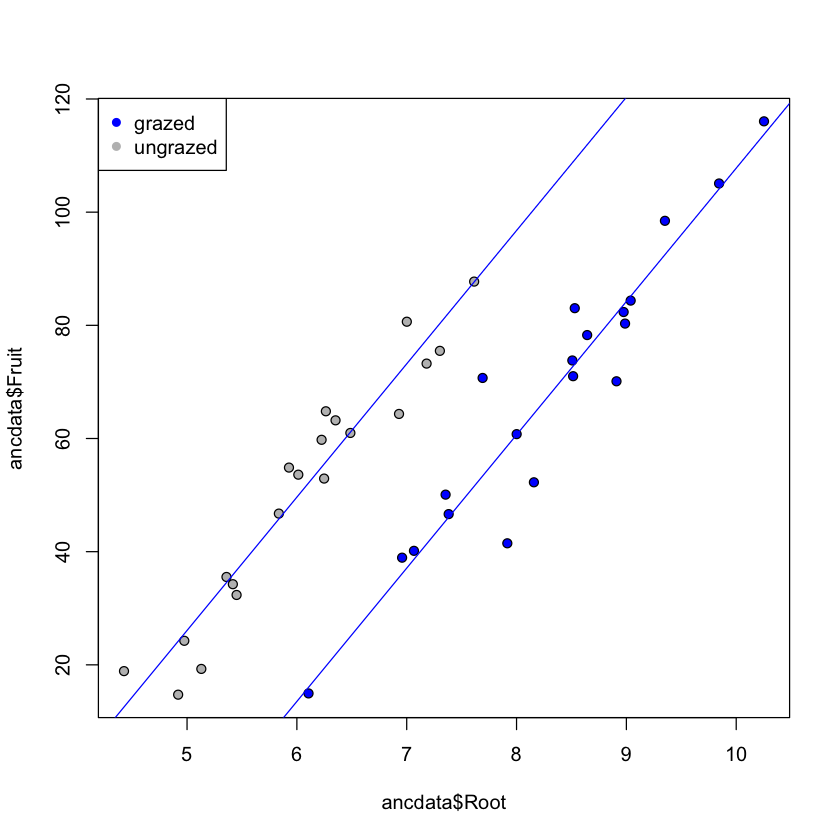

In [50]:
plot(ancdata$Root,ancdata$Fruit,pch=21,bg=(4*as.numeric(ancdata$Grazing)))
legend("topleft",c("grazed","ungrazed"),col=c(4,8),pch=16)
abline(-127.829,23.56,col="blue")
abline(-127.829+36.103,23.56,col="blue")

(End of Section 5. End of Module 2. [Return to top.](#Table-of-Contents))

* * *